In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as pyo

In [2]:
with open('StreamingHistory0.json', encoding="utf8") as sth0, \
    open('StreamingHistory1.json', encoding="utf8") as sth1, \
    open('StreamingHistory2.json', encoding="utf8") as sth2:
    
    sth0= json.load(sth0)
    sth1= json.load(sth1)
    sth2= json.load(sth2)
    
    sth0 = pd.json_normalize(sth0)
    sth1 = pd.json_normalize(sth1)
    sth2 = pd.json_normalize(sth2)

In [3]:
df = pd.concat([sth0,sth1,sth2]).reset_index(drop=True)
df

,endTime,artistName,trackName,msPlayed
0,2020-08-09 11:46,Calla Cabro,25. Grandes Éxitos,35660
1,2020-10-13 02:35,Arctic Monkeys,Baby I'm Yours,152613
2,2020-10-13 03:52,One Direction,Steal My Girl,108767
3,2020-10-13 03:55,BTS,Dynamite,199053
4,2020-10-13 03:59,BLACKPINK,Lovesick Girls,192760
...,...,...,...,...
27065,2021-10-10 21:04,PARTYNEXTDOOR,ANOTHER DAY,5480
27066,2021-10-10 22:50,Rod Stewart,Da Ya Think I'm Sexy?,331333
27067,2021-10-10 22:56,Rod Stewart,Da Ya Think I'm Sexy?,331333
27068,2021-10-10 23:01,Rod Stewart,Da Ya Think I'm Sexy?,331333


In [4]:
df['endTime'] = df['endTime'].str[:4].astype('int')
df['msPlayed'] = (df['msPlayed']/1000)%60
df

,endTime,artistName,trackName,msPlayed
0,2020,Calla Cabro,25. Grandes Éxitos,35.660
1,2020,Arctic Monkeys,Baby I'm Yours,32.613
2,2020,One Direction,Steal My Girl,48.767
3,2020,BTS,Dynamite,19.053
4,2020,BLACKPINK,Lovesick Girls,12.760
...,...,...,...,...
27065,2021,PARTYNEXTDOOR,ANOTHER DAY,5.480
27066,2021,Rod Stewart,Da Ya Think I'm Sexy?,31.333
27067,2021,Rod Stewart,Da Ya Think I'm Sexy?,31.333
27068,2021,Rod Stewart,Da Ya Think I'm Sexy?,31.333


In [5]:
vale = df.groupby(['trackName'], as_index=False)['msPlayed'].sum()
vale

,trackName,msPlayed
0,#01 LA VIRGINIDAD,58.840
1,#7: Estereotipos que no nos dejan ser feliz.,17.163
2,#ansolo,58.010
3,$outh $ide $uicide,49.319
4,'97 Bonnie & Clyde,4.890
...,...,...
3317,空と虚,5.595
3318,空に歌えば,2.335
3319,紅蓮華,56.166
3320,絶体絶命,2.015


In [6]:
df = df.drop_duplicates(subset='trackName', keep="last")
df

,endTime,artistName,trackName,msPlayed
0,2020,Calla Cabro,25. Grandes Éxitos,35.660
12,2020,Pusha T,Nosetalgia,9.800
13,2020,Pusha T,Sweet Serenade,2.620
14,2020,Pusha T,Santeria,2.270
15,2020,Miles Davis,"So What (feat. John Coltrane, Cannonball Adder...",48.600
...,...,...,...,...
27062,2021,Eladio Carrion,La H,3.276
27063,2021,Arin Ray,Change (with Kehlani),38.084
27064,2021,Trueno,FEEL ME??,5.091
27065,2021,PARTYNEXTDOOR,ANOTHER DAY,5.480


In [7]:
df = df.sort_values(by=['trackName'], ascending=True).reset_index(drop=True)
df

,endTime,artistName,trackName,msPlayed
0,2021,Hablemos de sexo,#01 LA VIRGINIDAD,58.840
1,2020,Mala Lengua,#7: Estereotipos que no nos dejan ser feliz.,17.163
2,2020,Kanaku y El Tigre,#ansolo,32.690
3,2021,$uicideboy$,$outh $ide $uicide,49.319
4,2021,Eminem,'97 Bonnie & Clyde,4.890
...,...,...,...,...
3317,2021,sasanomaly,空と虚,5.595
3318,2021,amazarashi,空に歌えば,2.335
3319,2021,LiSA,紅蓮華,5.487
3320,2021,EGOIST,絶体絶命,2.015


In [8]:
df['Time(min)'] = vale['msPlayed']
df= df.rename({'endTime':'Year','artistName': 'Artist', 'trackName': 'Song'}, axis=1)
df = df.drop(['msPlayed'], axis=1)
df = df.sort_values(by='Time(min)',ascending=False).reset_index(drop=True)

In [9]:
df

,Year,Artist,Song,Time(min)
0,2021,Eladio Carrion,Problema,12023.293
1,2021,Blxst,Gang Slide,11294.789
2,2021,Blxst,Got It All,10076.021
3,2021,$uicideboy$,A Girl Named Drool and a Pack of Kools,7889.859
4,2021,Vedo,You Got It,6701.425
...,...,...,...,...
3317,2021,Miley Cyrus,Party In The U.S.A.,0.000
3318,2021,Mac DeMarco,Treat Her Better,0.000
3319,2021,Marc E. Bassy,You & Me,0.000
3320,2021,Aminé,RATCHET SATURN GIRL,0.000


In [10]:
jcole = df.loc[(df['Artist']=="J. Cole") | (df["Song"].str.contains("J. Cole"))].sort_values(by='Time(min)',ascending=False).reset_index(drop=True)
jcole

,Year,Artist,Song,Time(min)
0,2021,J. Cole,a m a r i,4644.062
1,2021,J. Cole,4 Your Eyez Only,4517.469
2,2021,J. Cole,1 0 0 . m i l ‘ (with Bas),3937.557
3,2021,J. Cole,m y . l i f e (with 21 Savage & Morray),3263.364
4,2021,J. Cole,No Role Modelz,2745.842
5,2021,J. Cole,a p p l y i n g . p r e s s u r e,2372.104
6,2021,J. Cole,Wet Dreamz,2255.540
7,2021,J. Cole,Work Out,2207.487
8,2021,J. Cole,9 5 . s o u t h,1988.975
9,2021,J. Cole,p u n c h i n ‘ . t h e . c l o c k,1511.324


Text(0.5, 1.0, 'Most Listened Songs -> J.Cole')

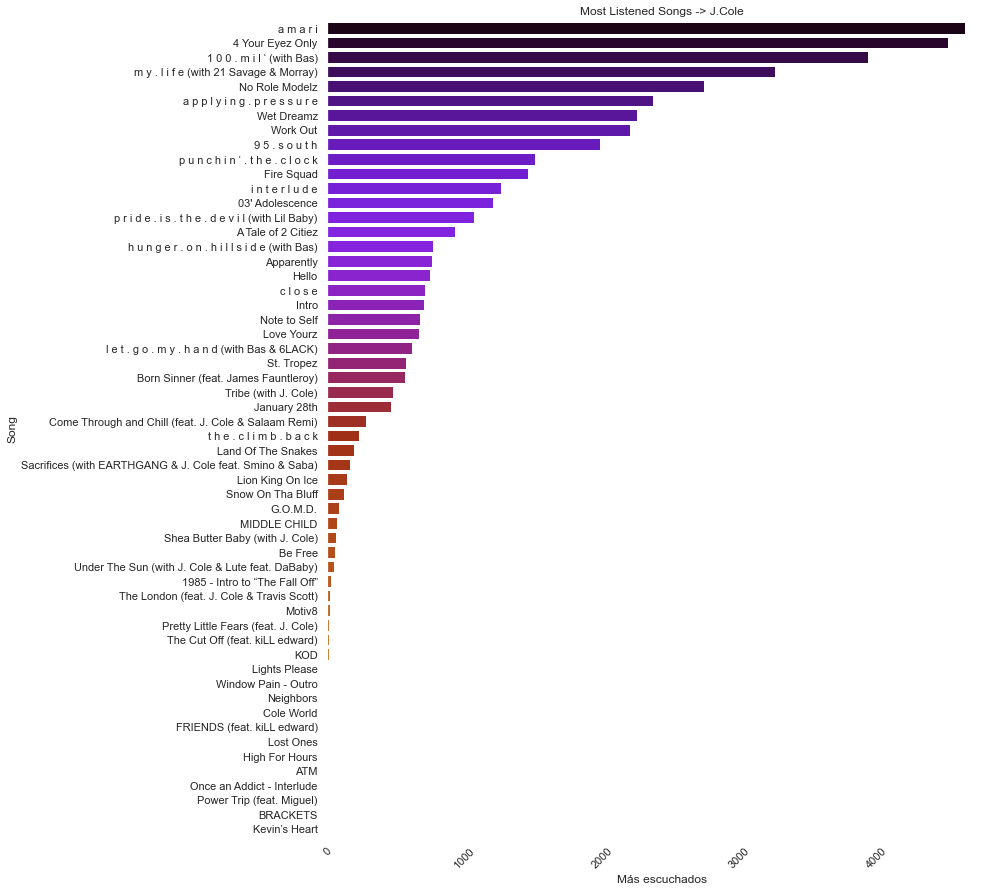

In [11]:
palette = sns.color_palette("gnuplot",len(jcole))
#palette.reverse()
plt.figure(figsize=(12,15))
sns.set(rc={'axes.facecolor':'white'})
sns.barplot(y=jcole['Song'],x=jcole['Time(min)'],palette=palette)
plt.xticks(rotation=45)
plt.xlabel('Más escuchados')
plt.title('Most Listened Songs -> J.Cole')

In [12]:
artist = df.groupby(['Artist'], as_index=False)['Time(min)'].sum().sort_values(by='Time(min)',ascending=False).reset_index(drop=True)

In [13]:
artist

,Artist,Time(min)
0,Blxst,49794.436
1,J. Cole,43655.394
2,Pop Smoke,35198.627
3,Russ,21027.316
4,$uicideboy$,20943.103
...,...,...
1115,Aloe Blacc,0.000
1116,LeRoyce,0.000
1117,easy life,0.000
1118,Chet Baker,0.000


In [14]:
artist['Time(min)'] = artist['Time(min)'].div(60)

In [15]:
artist

,Artist,Time(min)
0,Blxst,829.907267
1,J. Cole,727.589900
2,Pop Smoke,586.643783
3,Russ,350.455267
4,$uicideboy$,349.051717
...,...,...
1115,Aloe Blacc,0.000000
1116,LeRoyce,0.000000
1117,easy life,0.000000
1118,Chet Baker,0.000000


Text(0.5, 1.0, 'Artist')

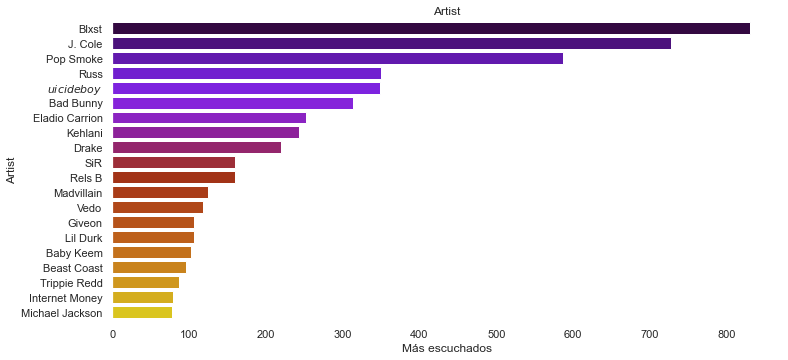

In [16]:
plt.figure(figsize=(12,5.5))
palette = sns.color_palette("gnuplot",20)
#palette.reverse()
sns.set(rc={'axes.facecolor':'white'})
sns.barplot(y=artist['Artist'][:20],x=artist['Time(min)'][:20],palette=palette)
#plt.xticks(rotation=45)
plt.xlabel('Más escuchados')
plt.title('Artist')

In [17]:
kehlani = df.loc[(df["Song"].str.contains("Kehlani")) | (df['Artist']=='Kehlani')].sort_values(by='Time(min)',ascending=False).reset_index(drop=True)

In [18]:
kehlani

,Year,Artist,Song,Time(min)
0,2021,Lil Durk,Love You Too (feat. Kehlani),6412.554
1,2021,Kehlani,Distraction,3549.033
2,2021,Kehlani,Nights Like This (feat. Ty Dolla $ign),2467.942
3,2021,Pink Sweat$,At My Worst (feat. Kehlani),1946.098
4,2021,Kehlani,Open (Passionate),1591.953
5,2021,Russ,Take You Back (feat. Kehlani),1582.318
6,2021,Kehlani,Lexii's Outro,1321.330
7,2021,Kehlani,Can I,1298.710
8,2021,Kehlani,Toxic,771.096
9,2021,Kehlani,Grieving (feat. James Blake),720.689


Text(0.5, 1.0, 'Artist -> Kehlani')

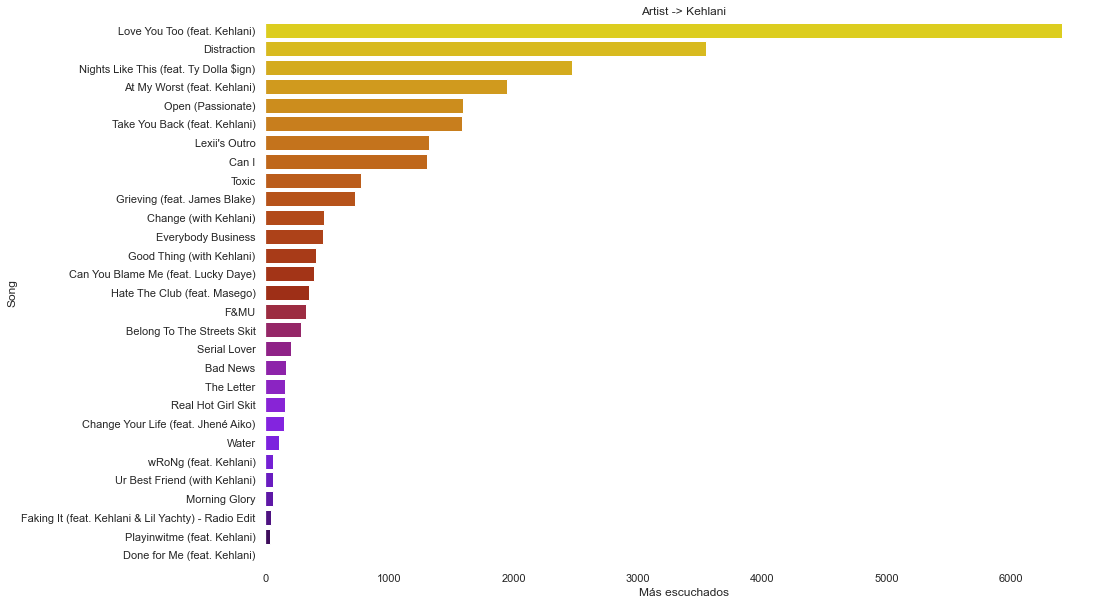

In [19]:
plt.figure(figsize=(15,10))
palette = sns.color_palette("gnuplot",len(kehlani))
palette.reverse()
sns.set(rc={'axes.facecolor':'white'})
sns.barplot(y=kehlani['Song'],x=kehlani['Time(min)'],palette=palette)
plt.xlabel('Más escuchados')
plt.title('Artist -> Kehlani')

In [20]:
suicide = df.loc[(df['Artist']=='$uicideboy$') | (df["Song"].str.contains("$uicideboy$"))].sort_values(by='Time(min)',ascending=False).reset_index(drop=True)

In [21]:
#suicide.sort_values(by=['Song'], ascending=False).head(20)

In [22]:
#suicide['Time(min)'].sum()

Text(0.5, 1.0, 'Artist -> SuicideboyS')

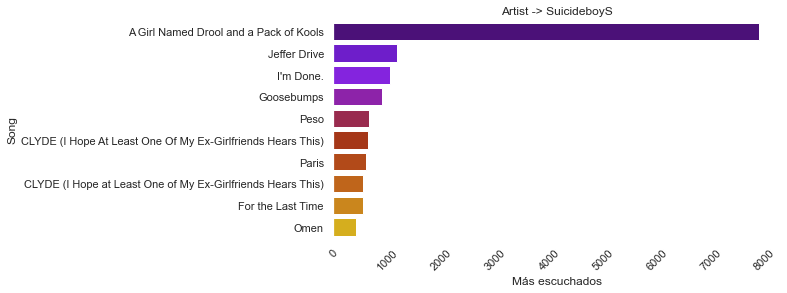

In [23]:
plt.figure(figsize=(8,4))
palette = sns.color_palette("gnuplot",len(suicide[:10]))
sns.set(rc={'axes.facecolor':'white'})
sns.barplot(y=suicide['Song'][:10],x=suicide['Time(min)'][:10],palette=palette)
plt.xticks(rotation=45)
plt.xlabel('Más escuchados')
plt.title('Artist -> SuicideboyS')

In [24]:
with open('YourLibrary.json', encoding="utf8") as f:
    data= json.load(f)
    data = pd.json_normalize(data['tracks'])

In [25]:
data= data.rename({'artist':'Artist','album': 'Album', 'track': 'Song'}, axis=1)
data

,Artist,Album,Song,uri
0,Billy Joel,Piano Man (Legacy Edition),Piano Man,spotify:track:70C4NyhjD5OZUMzvWZ3njJ
1,Gym Class Heroes,The Papercut Chronicles II,Ass Back Home (feat. Neon Hitch),spotify:track:3bfqkspKABT4pPicm6wC9F
2,Seven Lions,Worlds Apart,Worlds Apart,spotify:track:52UH1EJLO5Dk75Sy76xe5S
3,Blxst,No Love Lost,Got It All,spotify:track:5sHVIQEzTg8qcEstqlIig1
4,M2H,Así Empezó,Eres Tú,spotify:track:3IUTJ8jMD6E6GXql9fF0Zb
...,...,...,...,...
3007,Imagine Dragons,Night Visions,On Top Of The World,spotify:track:4eLSCSELtKxZwXnFbNLXT5
3008,Foxygen,How Can You Really,How Can You Really,spotify:track:1qY0j46pC8flm36R5E1ITB
3009,The Smashing Pumpkins,Being Beige,Being Beige,spotify:track:2VAuGWlBViH2aixmNLdSOr
3010,Trippie Redd,A Love Letter To You,Romeo & Juliet,spotify:track:6jT3etAOkvMUw0zsEw5QnR


In [26]:
merged_df = df.merge(data, how='inner', on=['Song']).drop(columns=['Artist_y','uri'])
merged_df = merged_df.rename({'Artist_x':'Artist'},axis=True)
merged_df = merged_df[['Year', 'Artist', 'Song', 'Album', 'Time(min)']]

In [27]:
merged_df

,Year,Artist,Song,Album,Time(min)
0,2021,Eladio Carrion,Problema,SEN2 KBRN VOL. 1,12023.293
1,2021,Blxst,Gang Slide,No Love Lost,11294.789
2,2021,Blxst,Got It All,No Love Lost,10076.021
3,2021,$uicideboy$,A Girl Named Drool and a Pack of Kools,Grey Sheep II,7889.859
4,2021,Vedo,You Got It,For You,6701.425
...,...,...,...,...,...
1307,2021,Ed Sheeran,One,x,0.000
1308,2020,MARINA,Teen Idle,Electra Heart,0.000
1309,2021,Paulo Londra,Demasiado Loco,Homerun,0.000
1310,2021,Miley Cyrus,Party In The U.S.A.,The Time Of Our Lives,0.000


In [28]:
sum_per_album = merged_df.groupby(['Album'], as_index=False)['Time(min)'].sum().sort_values(by='Time(min)',ascending=False).reset_index(drop=True)
sum_per_album

,Album,Time(min)
0,No Love Lost,42597.169
1,Shoot For The Stars Aim For The Moon,21853.990
2,The Off-Season,19550.792
3,SEN2 KBRN VOL. 1,13721.060
4,2014 Forest Hills Drive,13286.831
...,...,...
859,Radioactive,0.000
860,Finally Famous,0.000
861,Fire Within,0.000
862,In The Lonely Hour,0.000


In [29]:
sum_per_album['Album'] = sum_per_album['Album'].str.replace('$','S', regex=True)

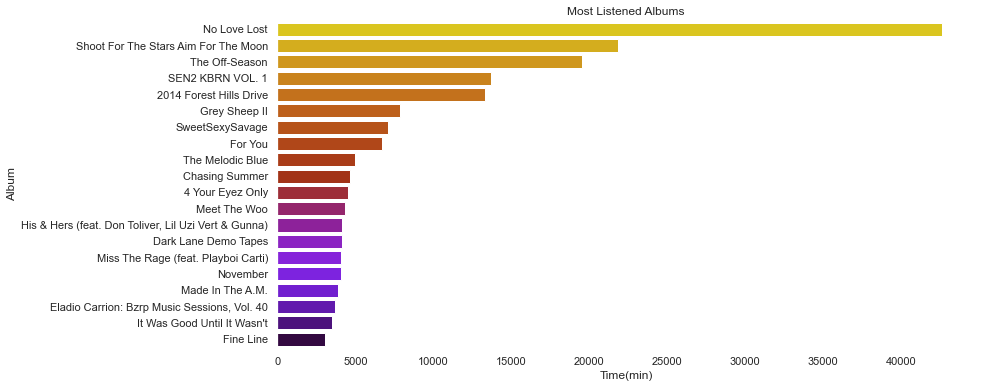

In [30]:
fig, ax = plt.subplots(figsize=(12.5,6))
palette = sns.color_palette("gnuplot",20)
palette.reverse()

sns.set(rc={'axes.facecolor':'white'})
sns.barplot(y=sum_per_album['Album'][:20],x=sum_per_album['Time(min)'][:20],palette=palette)

plt.title('Most Listened Albums')
plt.savefig('most_listened_albums.png',format='png',bbox_inches = "tight")

In [31]:
jcole_2 = merged_df.loc[(merged_df['Artist']=='J. Cole')]

In [32]:
jcole_2_albums_time = jcole_2.groupby(['Album'], as_index=False)['Time(min)'].sum().sort_values(by='Time(min)',ascending=False).reset_index(drop=True)

In [33]:
#jcole_2_albums_time['Time(min)'] = jcole_2_albums_time['Time(min)'].div(60)

In [34]:
jcole_2_albums_time

,Album,Time(min)
0,The Off-Season,19550.792
1,2014 Forest Hills Drive,13286.831
2,4 Your Eyez Only,4521.879
3,Cole World: The Sideline Story,2207.487
4,KOD,794.296
5,Hello,751.802
6,Born Sinner,568.745
7,Lewis Street,230.176
8,Snow On Tha Bluff,121.324
9,MIDDLE CHILD,69.946


In [35]:
import plotly.graph_objects as go
import plotly.offline as pyo

In [36]:
categories = list(jcole_2_albums_time['Album'][:4])
jcole_albums_time = list(jcole_2_albums_time['Time(min)'][:4].round(2))

categoriesgories = [*categories,categories[0]]
jcole_albums_time = [*jcole_albums_time,jcole_albums_time[0]]

In [37]:
print(categoriesgories)
print(jcole_albums_time)

['The Off-Season', '2014 Forest Hills Drive', '4 Your Eyez Only', 'Cole World: The Sideline Story', 'The Off-Season']
[19550.79, 13286.83, 4521.88, 2207.49, 19550.79]


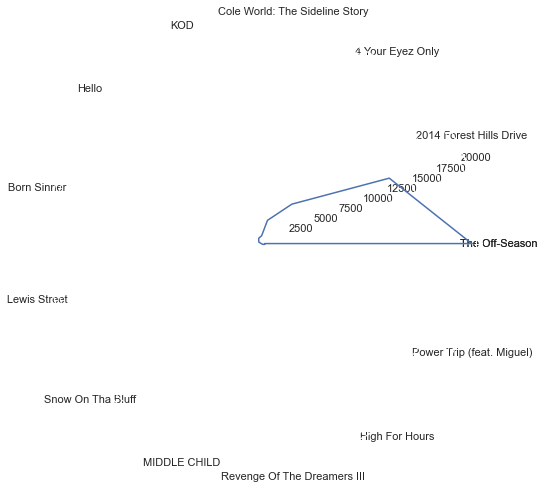

In [38]:
categories = list(jcole_2_albums_time['Album'])
jcole_albums_time = list(jcole_2_albums_time['Time(min)'].round(2))

categories = np.concatenate((categories, [categories[0]]))
jcole_albums_time = np.concatenate((jcole_albums_time, [jcole_albums_time[0]]))


label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(jcole_albums_time))

plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
plt.plot(label_loc, jcole_albums_time, label='Time(hours)')
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.show()

In [39]:
kehlani = merged_df.loc[(merged_df["Song"].str.contains("Kehlani")) | (merged_df['Artist']=='Kehlani')].drop_duplicates(subset='Song', keep="last").sort_values(by='Time(min)',ascending=False).reset_index(drop=True)
kehlani

,Year,Artist,Song,Album,Time(min)
0,2021,Kehlani,Distraction,SweetSexySavage,3549.033
1,2021,Kehlani,Nights Like This (feat. Ty Dolla $ign),While We Wait,2467.942
2,2021,Pink Sweat$,At My Worst (feat. Kehlani),At My Worst (feat. Kehlani),1946.098
3,2021,Russ,Take You Back (feat. Kehlani),Take You Back (feat. Kehlani),1582.318
4,2021,Kehlani,Can I,It Was Good Until It Wasn't,1298.710
5,2021,Kehlani,Toxic,It Was Good Until It Wasn't,771.096
6,2021,Kehlani,Grieving (feat. James Blake),It Was Good Until It Wasn't,720.689
7,2021,Kehlani,Hate The Club (feat. Masego),It Was Good Until It Wasn't,356.621
8,2021,Kehlani,Serial Lover,It Was Good Until It Wasn't,210.977
9,2021,Kehlani,Bad News,It Was Good Until It Wasn't,168.268


Text(0.5, 1.0, 'Artist -> Kehlani')

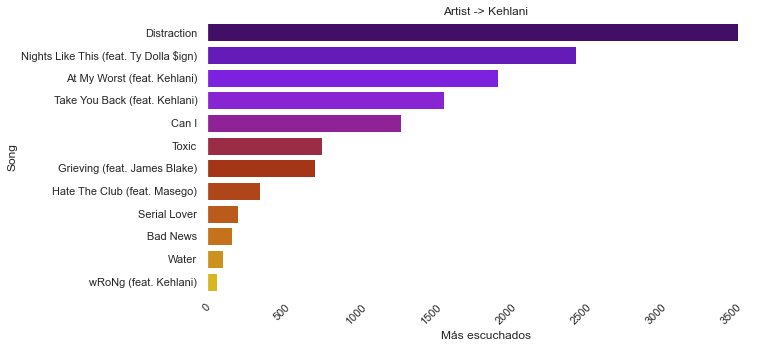

In [40]:
plt.figure(figsize=(10,5))
palette = sns.color_palette("gnuplot",len(kehlani))
sns.set(rc={'axes.facecolor':'white'})
sns.barplot(y=kehlani['Song'],x=kehlani['Time(min)'],palette=palette)
plt.xticks(rotation=45)
plt.xlabel('Más escuchados')
plt.title('Artist -> Kehlani')